In [320]:
import pandas as pd
import numpy as np
import io

In [321]:

df = pd.read_csv('weather.csv')

In [322]:
df

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01
...,...,...,...,...,...,...,...,...,...,...
181955,Soc Trang,28,23,8,SSW,0.0,75,50,1011,2016-12-28
181956,Soc Trang,30,24,21,ENE,7.2,81,50,1011,2017-12-28
181957,Soc Trang,26,24,9,ENE,1.3,91,75,1009,2018-12-28
181958,Soc Trang,30,23,11,E,0.0,74,6,1012,2019-12-28


In [323]:
ho_chi_minh = df[df['province'].str.lower().str.contains("ho chi minh")]

In [324]:
print(ho_chi_minh)

              province  max  min  wind wind_d  rain  humidi  cloud  pressure  \
4501  Ho Chi Minh City   29   22     6     SE  18.5      89     68      1010   
4502  Ho Chi Minh City   34   24     5      E   0.0      59     20      1010   
4503  Ho Chi Minh City   29   23     4      S   0.2      81     42      1008   
4504  Ho Chi Minh City   32   23     7      E   1.8      76     35      1012   
4505  Ho Chi Minh City   33   24     4     SE   0.0      69     15      1010   
...                ...  ...  ...   ...    ...   ...     ...    ...       ...   
9262  Ho Chi Minh City   30   23     6    ESE   2.5      84     64      1011   
9263  Ho Chi Minh City   30   21     9    SSW   0.0      59     50      1014   
9264  Ho Chi Minh City   34   25     5      E   0.0      67     28      1013   
9265  Ho Chi Minh City   33   25     9      E   0.0      66     38      1012   
9266  Ho Chi Minh City   31   25     7    ESE   2.9      71     41      1010   

            date  
4501  2009-01-01  
4

In [325]:
ho_chi_minh = ho_chi_minh.copy()  # Tạo một bản sao của DataFrame để tránh ảnh hưởng đến DataFrame gốc
ho_chi_minh['date'] = pd.to_datetime(ho_chi_minh['date'])

# Lấy những dòng trong khoảng từ ngày A đến ngày B
start_date = '2020-01-01'
end_date = '2021-12-31'
ho_chi_minh_edit = ho_chi_minh.loc[(ho_chi_minh['date'] >= start_date) & (ho_chi_minh['date'] <= end_date)]

In [326]:
ho_chi_minh_edit

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
4512,Ho Chi Minh City,35,24,9,ENE,0.0,51,11,1014,2020-01-01
4513,Ho Chi Minh City,30,23,8,NE,0.0,63,35,1011,2021-01-01
4525,Ho Chi Minh City,35,25,7,ESE,0.0,59,16,1013,2020-01-03
4526,Ho Chi Minh City,31,24,4,SE,2.5,70,59,1010,2021-01-03
4538,Ho Chi Minh City,34,24,5,SW,0.0,61,15,1012,2020-01-04
...,...,...,...,...,...,...,...,...,...,...
9049,Ho Chi Minh City,32,25,7,S,0.0,75,33,1009,2020-12-28
9113,Ho Chi Minh City,30,23,15,NNE,0.0,60,49,1011,2020-12-31
9177,Ho Chi Minh City,28,23,18,SW,0.6,66,51,1008,2020-12-22
9189,Ho Chi Minh City,30,25,9,S,0.1,68,53,1010,2020-12-30


In [327]:
column_name = 'wind_d'
ho_chi_minh_edit = ho_chi_minh_edit.drop(column_name, axis=1)
column_name = 'province'
ho_chi_minh_edit = ho_chi_minh_edit.drop(column_name, axis=1)


In [328]:
ho_chi_minh_edit=ho_chi_minh_edit.reset_index(drop=True)
#chuyen luong mua thanh boolean, voi luong mua >0.5mm thi tinh la co mua
ho_chi_minh_edit['rain'] = ho_chi_minh_edit['rain'] > 0.5
ho_chi_minh_edit['atemp'] = (ho_chi_minh_edit['max'] + ho_chi_minh_edit['min']) / 2
ho_chi_minh_edit = ho_chi_minh_edit.drop(['max', 'min'], axis=1)
print(ho_chi_minh_edit)


     wind   rain  humidi  cloud  pressure       date  atemp
0       9  False      51     11      1014 2020-01-01   29.5
1       8  False      63     35      1011 2021-01-01   26.5
2       7  False      59     16      1013 2020-01-03   30.0
3       4   True      70     59      1010 2021-01-03   27.5
4       5  False      61     15      1012 2020-01-04   29.0
..    ...    ...     ...    ...       ...        ...    ...
529     7  False      75     33      1009 2020-12-28   28.5
530    15  False      60     49      1011 2020-12-31   26.5
531    18   True      66     51      1008 2020-12-22   25.5
532     9  False      68     53      1010 2020-12-30   27.5
533     7   True      71     41      1010 2020-12-19   28.0

[534 rows x 7 columns]


In [329]:
from matplotlib import pyplot as plt
import seaborn as sns

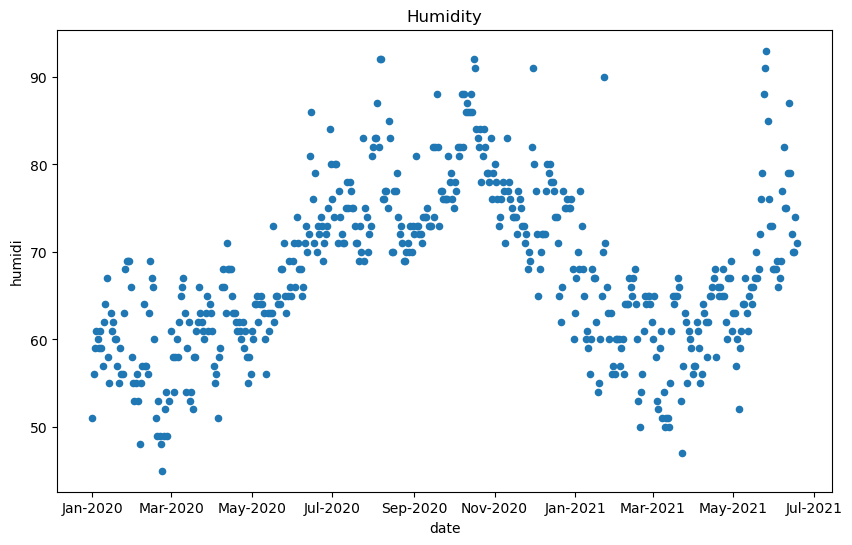

In [330]:
ho_chi_minh_edit.plot(kind='scatter', x='date', y='humidi',figsize=(10,6))
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Humidity')
plt.show()

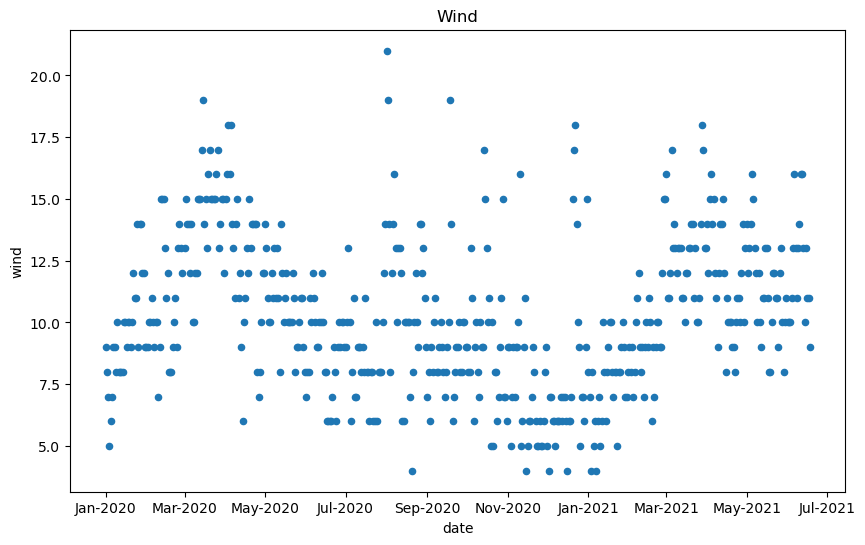

In [331]:
ho_chi_minh_edit.plot(kind='scatter', x='date', y='wind',figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Wind')
plt.show()

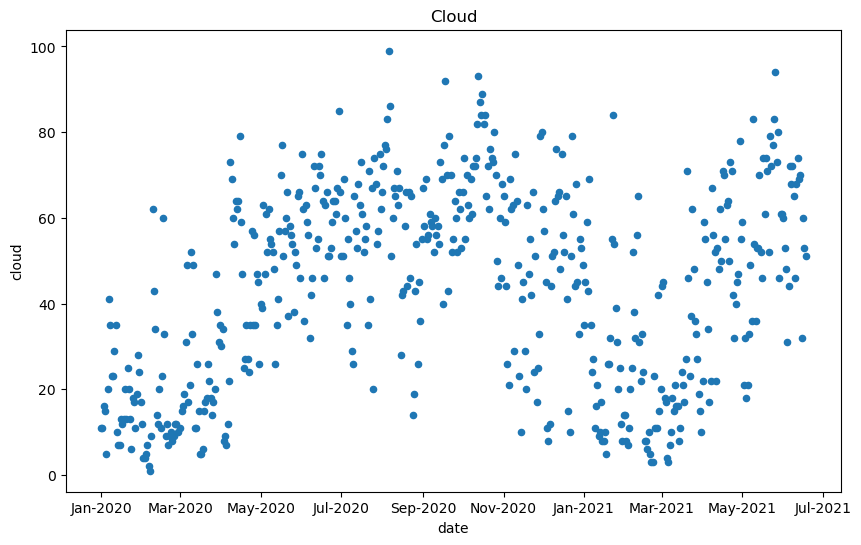

In [332]:
ho_chi_minh_edit.plot(kind='scatter', x='date', y='cloud',figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Cloud')
plt.show()

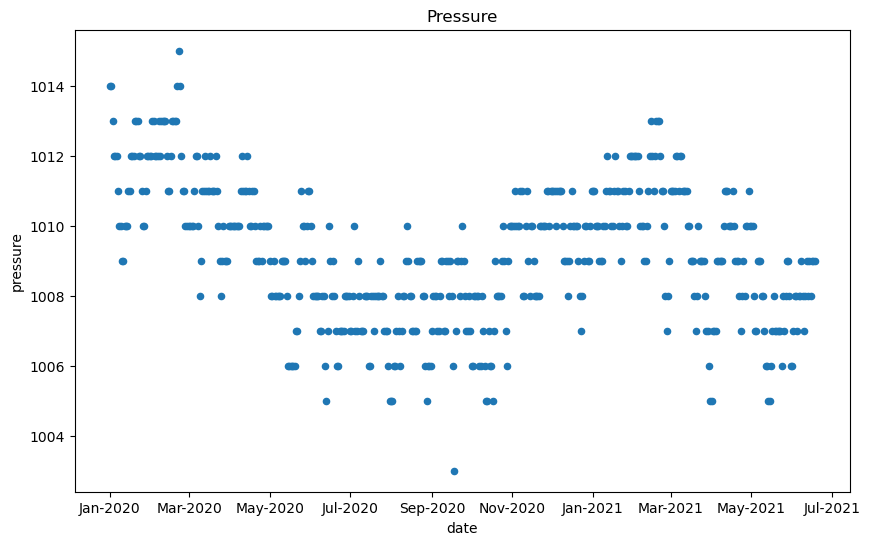

In [333]:
ho_chi_minh_edit.plot(kind='scatter', x='date', y='pressure',figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Pressure')
plt.show()

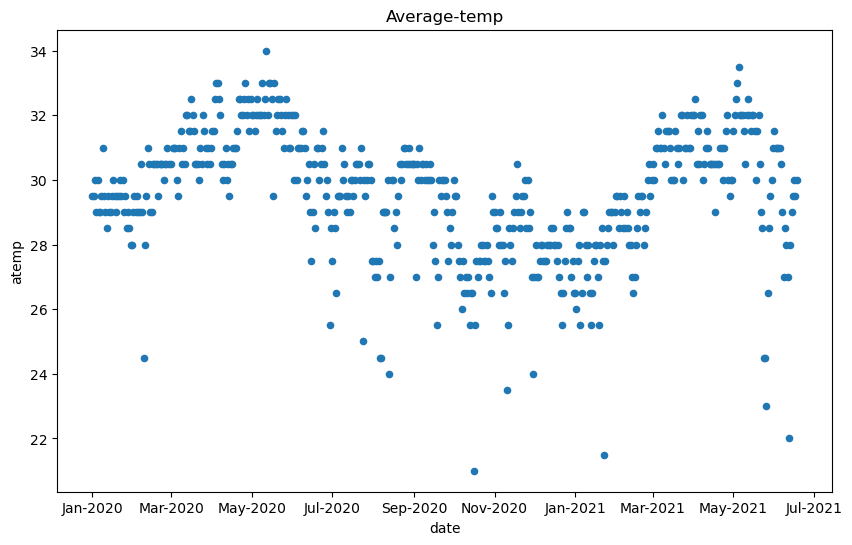

In [334]:
ho_chi_minh_edit.plot(kind='scatter', x='date', y='atemp',figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Average-temp')
plt.show()

In [335]:
#check data thieu
ho_chi_minh_edit.info()
for col in ho_chi_minh_edit.columns:
    missing_data = ho_chi_minh_edit[col].isna().sum()
    missing_percent = missing_data/len(ho_chi_minh_edit)*100
    print(f"cot {col}: bi thieu {missing_percent}% data")
#chuyen doi ngay thang ve dang so 
ho_chi_minh_edit['date'] = (ho_chi_minh_edit['date'].astype('datetime64[s]') - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   wind      534 non-null    int64         
 1   rain      534 non-null    bool          
 2   humidi    534 non-null    int64         
 3   cloud     534 non-null    int64         
 4   pressure  534 non-null    int64         
 5   date      534 non-null    datetime64[ns]
 6   atemp     534 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4)
memory usage: 25.7 KB
cot wind: bi thieu 0.0% data
cot rain: bi thieu 0.0% data
cot humidi: bi thieu 0.0% data
cot cloud: bi thieu 0.0% data
cot pressure: bi thieu 0.0% data
cot date: bi thieu 0.0% data
cot atemp: bi thieu 0.0% data


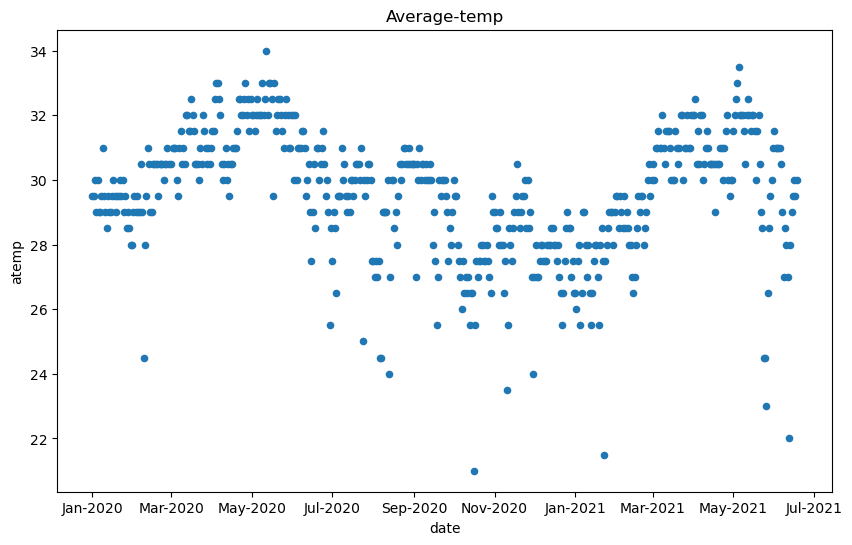

In [ ]:
ho_chi_minh_edit.plot(kind='scatter', x='date', y='atemp',figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Average-temp')
plt.show()

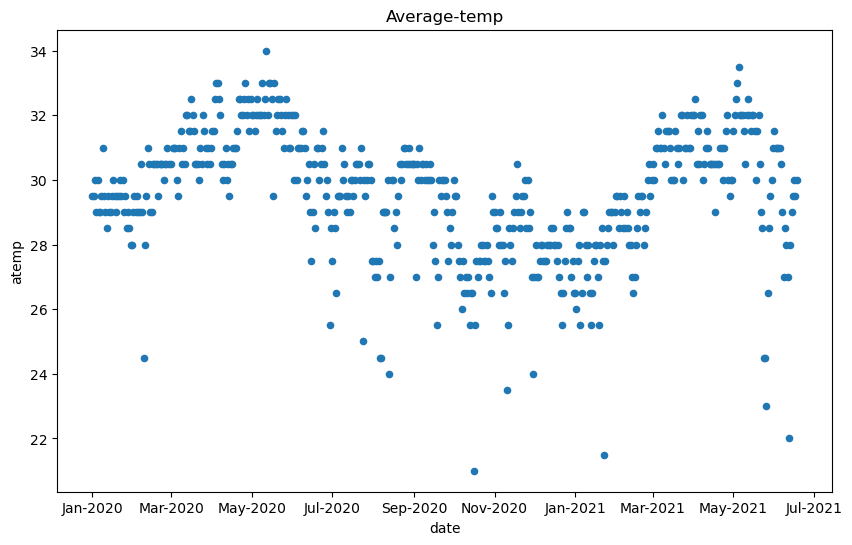

In [ ]:
ho_chi_minh_edit.plot(kind='scatter', x='date', y='atemp',figsize=(10,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Average-temp')
plt.show()

In [341]:
print(ho_chi_minh_edit)
x=ho_chi_minh_edit.iloc[:, [0, 2, 3, 4, 5, 6]].values


     wind   rain  humidi  cloud  pressure        date  atemp
0       9  False      51     11      1014  1577836800   29.5
1       8  False      63     35      1011  1609459200   26.5
2       7  False      59     16      1013  1578009600   30.0
3       4   True      70     59      1010  1609632000   27.5
4       5  False      61     15      1012  1578096000   29.0
..    ...    ...     ...    ...       ...         ...    ...
529     7  False      75     33      1009  1609113600   28.5
530    15  False      60     49      1011  1609372800   26.5
531    18   True      66     51      1008  1608595200   25.5
532     9  False      68     53      1010  1609286400   27.5
533     7   True      71     41      1010  1608336000   28.0

[534 rows x 7 columns]
[[9.0000000e+00 5.1000000e+01 1.1000000e+01 1.0140000e+03 1.5778368e+09
  2.9500000e+01]
 [8.0000000e+00 6.3000000e+01 3.5000000e+01 1.0110000e+03 1.6094592e+09
  2.6500000e+01]
 [7.0000000e+00 5.9000000e+01 1.6000000e+01 1.0130000e+03 1.578009

In [337]:
y=ho_chi_minh_edit.iloc[:, 1].values

In [342]:
from sklearn.model_selection import train_test_split
np.random.seed(53)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

array([[1.3000000e+01, 6.5000000e+01, 1.7000000e+01, 1.0090000e+03,
        1.6160256e+09, 3.1500000e+01],
       [9.0000000e+00, 7.5000000e+01, 6.6000000e+01, 1.0060000e+03,
        1.6015104e+09, 3.0000000e+01],
       [9.0000000e+00, 7.6000000e+01, 5.3000000e+01, 1.0070000e+03,
        1.6014240e+09, 2.9000000e+01],
       [1.0000000e+01, 6.7000000e+01, 3.3000000e+01, 1.0130000e+03,
        1.6132608e+09, 2.6500000e+01],
       [5.0000000e+00, 8.0000000e+01, 6.2000000e+01, 1.0110000e+03,
        1.6067808e+09, 2.7000000e+01],
       [1.5000000e+01, 6.4000000e+01, 3.1000000e+01, 1.0090000e+03,
        1.5855264e+09, 3.0500000e+01],
       [1.3000000e+01, 5.2000000e+01, 9.0000000e+00, 1.0110000e+03,
        1.5825888e+09, 3.0500000e+01],
       [1.1000000e+01, 6.6000000e+01, 7.0000000e+01, 1.0050000e+03,
        1.6209504e+09, 3.1500000e+01],
       [8.0000000e+00, 7.2000000e+01, 5.6000000e+01, 1.0070000e+03,
        1.5992640e+09, 3.1000000e+01],
       [1.1000000e+01, 6.2000000e+01,